# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

/Users/frederik/Library/Mobile Documents/com~apple~CloudDocs/Polit/8. semester/IntroProg/Ny/projects-2023-vennerne/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederik/Library/Mobile Documents/com~apple~CloudDocs/Polit/8. semester/IntroProg/Ny/projects-2023-vennerne/inauguralproject/HouseholdSpecializationModel.py:62: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederik/Library/Mobile Documents/com~apple~CloudDocs/Polit/8. semester/IntroProg/Ny/projects-2023-vennerne/inauguralproject/HouseholdSpecializationModel.py:66: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


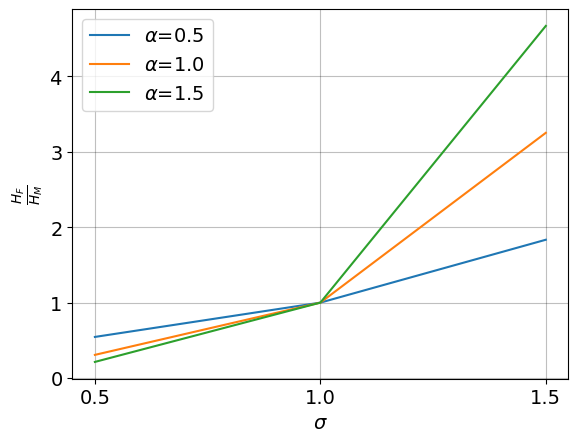

In [3]:
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
import matplotlib.pyplot as plt

model = HouseholdSpecializationModelClass()

alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1.0, 1.5]

Hratio05 = []
model.par.sigma = 0.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    Hratio05.append(dis_sol.HF/dis_sol.HM) 

Hratio10 = []
model.par.sigma = 1.0
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    Hratio10.append(dis_sol.HF/dis_sol.HM) 

Hratio15 = []
model.par.sigma = 1.5
for alpha in alpha_values:
    model.par.alpha = alpha
    dis_sol = model.solve_discrete()
    Hratio15.append(dis_sol.HF/dis_sol.HM) 


fig = plt.figure()
plt.plot(sigma_values, Hratio05, label=r"$\alpha$=0.5")
plt.plot(sigma_values, Hratio10, label=r"$\alpha$=1.0")
plt.plot(sigma_values, Hratio15, label=r"$\alpha$=1.5")
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$\frac{H_F}{H_M}$")
plt.xticks(np.arange(min(sigma_values), max(sigma_values)+0.5, 0.5))
plt.legend()


# Question 2

Explain your code and procedure

[0.22314355131420976, 0.0, 0.0, -0.11778303565638351, -0.2231435513142097]


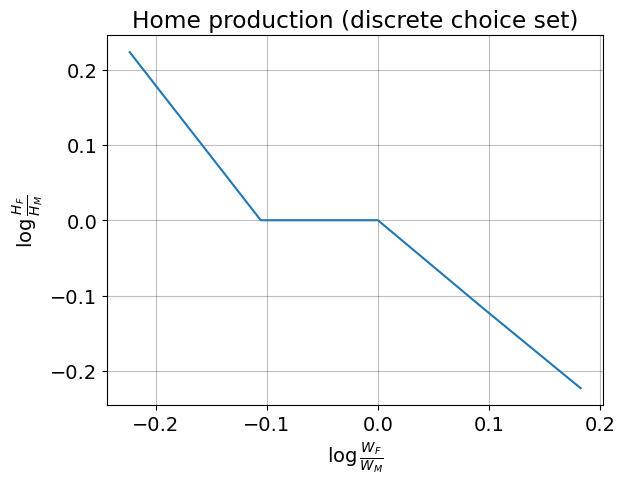

In [6]:
Hratio = []
model.par.sigma = 1.0
model.par.alpha = 0.50
for wF in model.par.wF_vec:
    model.par.wF = wF
    dis_sol = model.solve_discrete()
    Hratio.append(np.log(dis_sol.HF/dis_sol.HM))
print(Hratio)


# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(np.log(model.par.wF_vec), Hratio)

ax.set_title('Home production (discrete choice set)')
ax.set_xlabel(r"$\log\frac{W_F}{W_M}$")
ax.set_ylabel(r"$\log\frac{H_F}{H_M}$");




# Question 3

Explain your code and procedure

[0.2231532730184448, 0.10536826764744818, 5.896917626330302e-06, -0.09530861978103608, -0.18230738741155433]


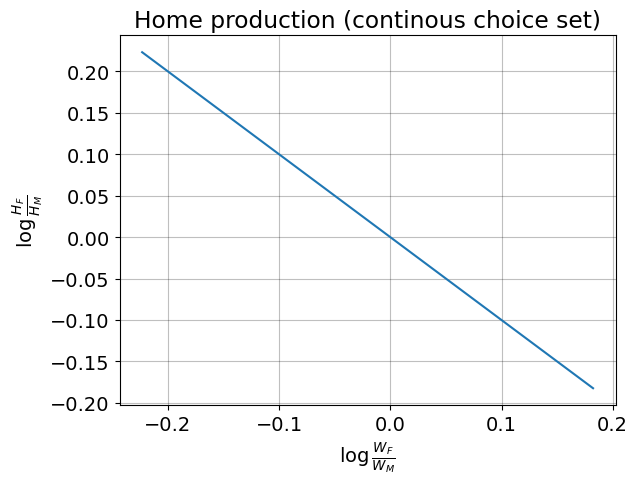

In [7]:

ratioQ3 = []
model.par.sigma = 1.0
model.par.alpha = 0.50
for wF in model.par.wF_vec:
    model.par.wF = wF
    con_sol = model.solve()
    ratioQ3.append(np.log(con_sol.HF/con_sol.HM))
print(ratioQ3)


# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(np.log(model.par.wF_vec), ratioQ3)

ax.set_title('Home production (continous choice set)')
ax.set_xlabel(r"$\log\frac{W_F}{W_M}$")
ax.set_ylabel(r"$\log\frac{H_F}{H_M}$");



ADD CONCISE CONLUSION.